# 🛍️ E-commerce Sales Analysis
This project explores sales trends, customer segments, and product performance in an e-commerce platform.(AMAZON)

## Dataset Terms
- **Category:** Type of product. (String)
- **Size**: Size of the product. (String)
- **Date**: Date of the sale. (Date)
- **Status**: Status of the sale. (String)
- **Fulfilment**: Method of fulfilment. (String)
- **Style**: Style of the product. (String)
- **SKU**: Stock Keeping Unit. (String)
- **ASIN**: Amazon Standard Identification Number. (String)
- **Courier Status**: Status of the courier. (String)
- **Qty**: Quantity of the product. (Integer)
- **Amount**: Amount of the sale. (Float)
- **B2B**: Business to business sale. (Boolean)
- **Currency**: The currency used for the sale. (String)

#Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt


📂 Load & Preview Data

In [8]:
#load resource
df = pd.read_csv('/content/Amazon Sale Report.csv')
df.head()
df.info()

/tmp/ipython-input-8-4070431111.py:2: DtypeWarning: Columns (21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Amazon Sale Report.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75117 entries, 0 to 75116
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               75117 non-null  int64  
 1   Order ID            75117 non-null  object 
 2   Date                75117 non-null  object 
 3   Status              75117 non-null  object 
 4   Fulfilment          75117 non-null  object 
 5   Sales Channel       75116 non-null  object 
 6   ship-service-level  75116 non-null  object 
 7   Style               75116 non-null  object 
 8   SKU                 75116 non-null  object 
 9   Category            75116 non-null  object 
 10  Size                75116 non-null  object 
 11  ASIN                75116 non-null  object 
 12  Courier Status      70752 non-null  object 
 13  Qty                 75116 non-null  float64
 14  currency            70633 non-null  object 
 15  Amount              70633 non-null  float64
 16  ship

In [9]:
#Handling Missing Values
df.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,1
ship-service-level,1
Style,1
SKU,1
Category,1


In [10]:
# Drop rows with missing 'Amount' or 'Currency' if critical
df.dropna(subset=['Amount', 'currency'], inplace=True)

# Fill missing 'Courier Status' with a placeholder
df['Courier Status'] = df['Courier Status'].fillna('Unknown')

# Drop unnecessary unnamed column if exists
df.drop(columns=['Unnamed: 22'], inplace=True, errors='ignore')


In [11]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,0.0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,1.0,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,1.0,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,0.0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,1.0,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN


Convert The 'Date' Coluomn to datetime format for time-based analysis.

###Create New Columns (Feature Engineering)

In [14]:
#Total Revenue per order(if not already calculated)
# Total Revenue per order (if not already calculated)
df['Total Revenue'] = df['Qty'] * df['Amount']

#profit margin
df['Profit Margin'] = (df['Total Revenue'] - df['Amount']) / df['Amount'] * 100

# Flag high-volume orders
df['High Volume'] = df['Qty'].apply(lambda x: 'Yes' if x >= 10 else 'No')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 70633 entries, 0 to 75115
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               70633 non-null  int64  
 1   Order ID            70633 non-null  object 
 2   Date                70633 non-null  object 
 3   Status              70633 non-null  object 
 4   Fulfilment          70633 non-null  object 
 5   Sales Channel       70633 non-null  object 
 6   ship-service-level  70633 non-null  object 
 7   Style               70633 non-null  object 
 8   SKU                 70633 non-null  object 
 9   Category            70633 non-null  object 
 10  Size                70633 non-null  object 
 11  ASIN                70633 non-null  object 
 12  Courier Status      70633 non-null  object 
 13  Qty                 70633 non-null  float64
 14  currency            70633 non-null  object 
 15  Amount              70633 non-null  float64
 16  ship-city

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Total Revenue,Profit Margin,High Volume
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,0.0,-100.0,No
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,406.0,0.0,No
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,329.0,0.0,No
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,0.0,-100.0,No
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,574.0,0.0,No


In [16]:
# Quantifying the missing values,
# This shows the percentage of missing values per column—helpful for deciding whether to drop, impute, or investigate.
missing = df.isnull().mean().sort_values(ascending=False)
missing[missing > 0]

,0
fulfilled-by,0.663896
promotion-ids,0.332932
Profit Margin,0.018674
ship-city,0.000269
ship-state,0.000269
ship-postal-code,0.000269
ship-country,0.000269


In [17]:
#Check for Negative or Zero Values
df[df['Amount']<= 0]

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Total Revenue,Profit Margin,High Volume
212,212,408-4547464-4180323,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3568,JNE3568-KR-XXL,kurta,...,BHUBANESWAR,ODISHA,752054.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,0.0,NaN,No
374,374,408-5020509-5674715,04-30-22,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,JNE3798,JNE3798-KR-M,Western Dress,...,NEW DELHI,DELHI,110096.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,0.0,NaN,No
385,385,408-3137526-3167563,04-30-22,Shipped,Amazon,Amazon.in,Standard,JNE3405,JNE3405-KR-L,kurta,...,DARJEELING,WEST BENGAL,734101.0,IN,NaN,False,NaN,0.0,NaN,No
388,388,408-7971979-8745937,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0401,J0401-DR-XS,Western Dress,...,LUDHIANA,PUNJAB,141001.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,0.0,NaN,No
392,392,408-0912805-7526753,04-30-22,Shipped,Amazon,Amazon.in,Expedited,SET365,SET365-KR-NP-L,Set,...,MUMBAI,MAHARASHTRA,400101.0,IN,NaN,False,NaN,0.0,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74906,74906,408-6176498-5763530,05-10-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3797,JNE3797-KR-L,Western Dress,...,tirur malappuram,KERALA,676101.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,0.0,NaN,No
74967,74967,408-9438866-4604356,05-10-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0244,J0244-SKD-L,Set,...,MUMBAI,MAHARASHTRA,400072.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,0.0,NaN,No
74973,74973,408-3457950-1814733,05-10-22,Shipped,Amazon,Amazon.in,Standard,JNE3614,JNE3614-KR-XXXL,kurta,...,HYDERABAD,TELANGANA,500086.0,IN,NaN,False,NaN,0.0,NaN,No
75034,75034,408-0106883-9317944,05-10-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET269,SET269-KR-NP-XS,Set,...,BHARATPUR,RAJASTHAN,321001.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,0.0,NaN,No


In [18]:
#Normalize For Modeling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Revenue_Scaled'] = scaler.fit_transform(df[['Total Revenue']])
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Total Revenue,Profit Margin,High Volume,Revenue_Scaled
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,0.0,-100.0,No,0.000000
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,406.0,0.0,No,0.009088
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,329.0,0.0,No,0.007365
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,0.0,-100.0,No,0.000000
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,TAMIL NADU,600073.0,IN,NaN,False,NaN,574.0,0.0,No,0.012849


### Outlier Detection – Don’t Let Them Skew You Use IQR or Z-score to detect outliers in Amount, Qty, or Total Revenue

In [20]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Amount'] < Q1 - 1.5 * IQR) | (df['Amount'] > Q3 + 1.5 * IQR)]
outliers


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Total Revenue,Profit Margin,High Volume,Revenue_Scaled
102,102,408-7698765-2294756,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET277,SET277-KR-NP-XXL,Set,...,MAHARASHTRA,421502.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,1338.0,0.0,No,0.029952
146,146,171-0131752-2560336,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET355,SET355-KR-PP-M,Set,...,UTTAR PRADESH,225001.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,1399.0,0.0,No,0.031317
243,243,408-2759943-9849959,04-30-22,Shipped,Amazon,Amazon.in,Expedited,SET363,SET363-KR-NP-XXL,Set,...,WEST BENGAL,700051.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,1338.0,0.0,No,0.029952
265,265,171-6655820-6440356,04-30-22,Shipped,Amazon,Amazon.in,Expedited,J0008,J0008-SKD-XXL,Set,...,MAHARASHTRA,400101.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,4260.0,100.0,No,0.095362
299,299,404-7491342-1035558,04-30-22,Shipped,Amazon,Amazon.in,Expedited,J0280,J0280-SKD-S,Set,...,MAHARASHTRA,401107.0,IN,NaN,False,NaN,1463.0,0.0,No,0.032750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74960,74960,171-3502000-6477118,05-10-22,Shipped,Amazon,Amazon.in,Expedited,SAR135,SAR135,Saree,...,TAMIL NADU,605602.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,6174.0,200.0,No,0.138207
74961,74961,171-3502000-6477118,05-10-22,Shipped,Amazon,Amazon.in,Expedited,SAR137,SAR137,Saree,...,TAMIL NADU,605602.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,2744.0,100.0,No,0.061426
74997,74997,405-1818904-4697915,05-10-22,Shipped,Amazon,Amazon.in,Expedited,J0277,J0277-SKD-S,Set,...,UTTAR PRADESH,201301.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,1364.0,0.0,No,0.030534
75025,75025,171-5908278-0695504,05-10-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0230,J0230-SKD-L,Set,...,UTTAR PRADESH,247001.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,1349.0,0.0,No,0.030198


### Automate with a Cleaning Function

In [21]:
def clean_ecommerce_data(df):
    df = df.dropna(subset=['Amount', 'currency'])
    df['Courier Status'] = df['Courier Status'].fillna('Unknown')
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month_name()
    df['Weekday'] = df['Date'].dt.day_name()
    df['Total Revenue'] = df['Qty'] * df['Amount']
    df['Profit Margin'] = (df['Total Revenue'] - df['Amount']) / df['Amount'] * 100
    df['High Volume'] = df['Qty'].apply(lambda x: 'Yes' if x >= 10 else 'No')
    return df
clean_ecommerce_data

<function __main__.clean_ecommerce_data(df)>

In [22]:
df.describe(include='all')  # get a full overview


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Total Revenue,Profit Margin,High Volume,Revenue_Scaled
count,70633.000000,70633,70633,70633,70633,70633,70633,70633,70633,70633,...,70614,70614.000000,70614,47117,70633,23740,70633.000000,69314.000000,70633,70633.000000
unique,NaN,65964,53,10,2,1,2,1290,6470,8,...,61,NaN,1,2898,2,1,NaN,NaN,1,NaN
top,NaN,171-5057375-2831560,04-14-22,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3405-KR-L,Set,...,MAHARASHTRA,NaN,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,NaN,NaN,No,NaN
freq,NaN,12,1771,43806,46893,70633,46385,1711,388,27817,...,12250,NaN,70614,25967,70134,23740,NaN,NaN,70633,NaN
mean,37594.250987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,462712.568853,NaN,NaN,NaN,NaN,619.981779,-4.375739,NaN,0.013879
std,21689.494873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,193160.342030,NaN,NaN,NaN,NaN,384.000624,22.478551,NaN,0.008596
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,110001.000000,NaN,NaN,NaN,NaN,0.000000,-100.000000,NaN,0.000000
25%,18785.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,380054.000000,NaN,NaN,NaN,NaN,426.000000,0.000000,NaN,0.009536
50%,37597.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,500025.000000,NaN,NaN,NaN,NaN,582.000000,0.000000,NaN,0.013028
75%,56404.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,600024.000000,NaN,NaN,NaN,NaN,774.000000,0.000000,NaN,0.017326


In [23]:
total = sum(df['Amount'])
print(total)

45423482.4499999


## B. Univariate Analysis
1. Distribution of Amount
2. Category-Wise Order Counts

<function matplotlib.pyplot.show(close=None, block=None)>

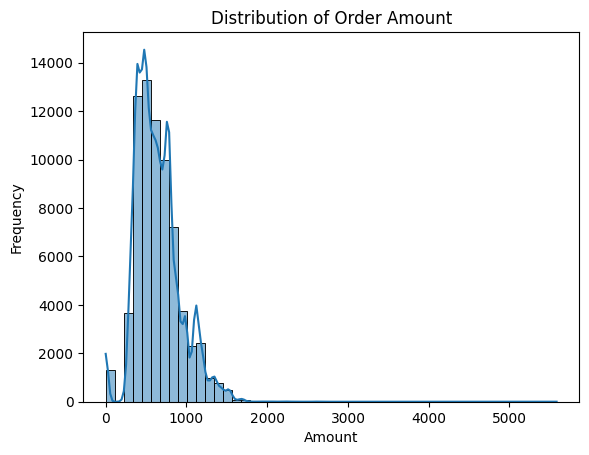

In [25]:
sns.histplot(df['Amount'], bins=50, kde=True)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Order Amount')
plt.show

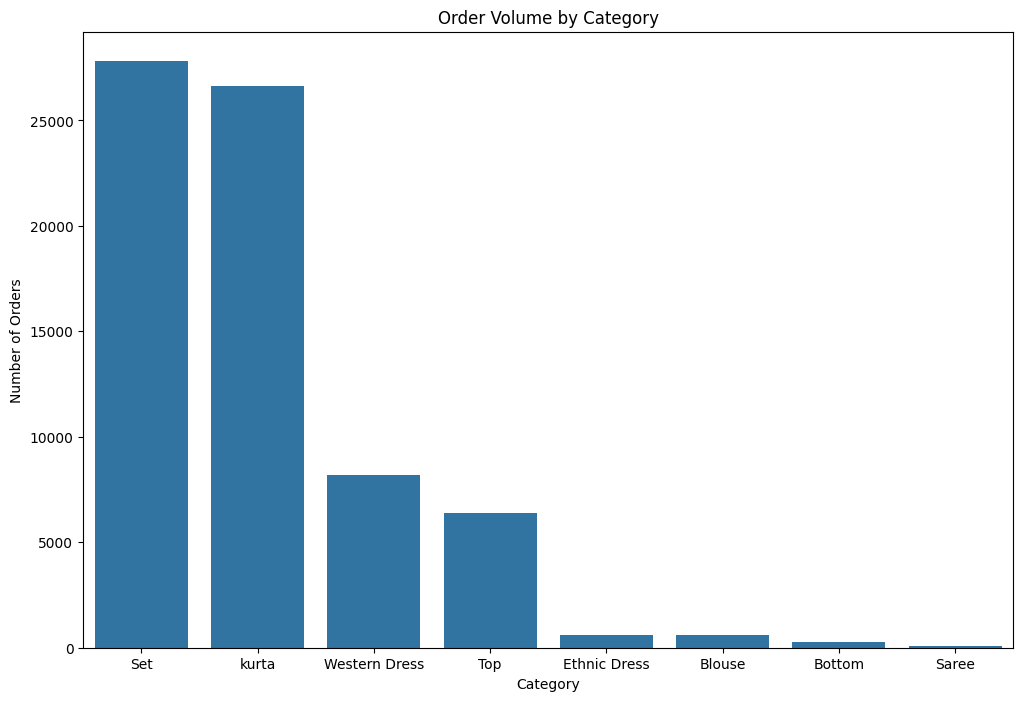

In [33]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.title('Order Volume by Category')
plt.ylabel('Number of Orders')
plt.xlabel('Category')
plt.show()

## C. Bivariate Analysis (relationships between two variables)
- Profit vs. Revenue
- Boxplot - Amount by Courier Status


<function matplotlib.pyplot.show(close=None, block=None)>

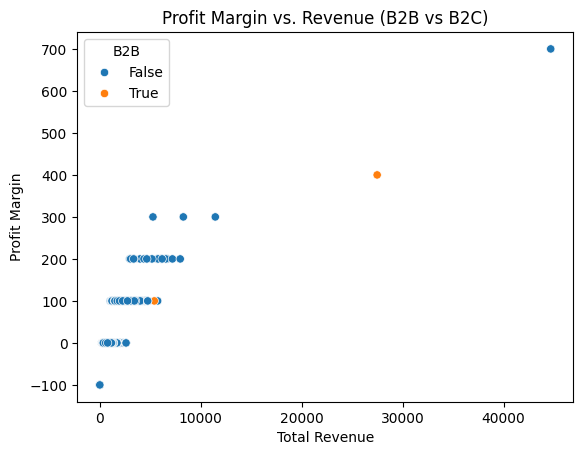

In [34]:
sns.scatterplot(x='Total Revenue', y='Profit Margin', data=df, hue='B2B')
plt.title('Profit Margin vs. Revenue (B2B vs B2C)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

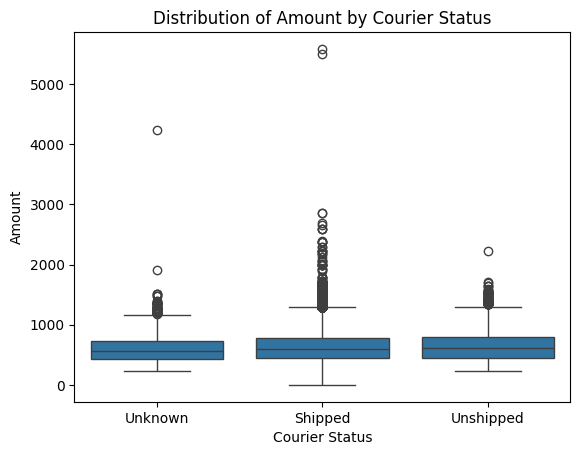

In [35]:
#Boxplot
sns.boxplot(x='Courier Status', y='Amount', data=df)
plt.title('Distribution of Amount by Courier Status')
plt.show

## D. Time Series Analysis
- Revenue Over Time

In [36]:
time_series = df.groupby('Date')['Total Revenue'].sum().reset_index()
fig = px.line(time_series, x='Date', y='Total Revenue', title='Revenue Over Time')
fig.show()

## E. Geo-based Analysis (if location data exists)
- Revenue by Ship Country


In [39]:
country_rev = df.groupby('ship-country')['Total Revenue'].sum().reset_index()

fig = px.choropleth(
    data_frame=country_rev,
    locations='ship-country',
    locationmode='country names',
    color='Total Revenue',
    title='🌐 Revenue by Country',
    hover_name='ship-country',
    hover_data={'Total Revenue': ':.2f'},  # Format with 2 decimal places
    color_continuous_scale='Viridis'
)

# Format color axis to show currency in millions or lakhs
fig.update_layout(
    coloraxis_colorbar=dict(
        title='Revenue (₹)',
        tickprefix='₹',
        ticks='outside'
    )
)

# Optional: Format tick labels using suffixes (M = Million, K = Thousand)
fig.update_traces(
    hovertemplate='<b>%{hovertext}</b><br>Total Revenue: ₹%{z:,.2f}<extra></extra>'
)

fig.show()



## Segment based insights
- Revenue by B2B vs B2C
- Top 10 Cities by Sales
- Heatmap - Correlation Across Table features



In [40]:
b2b_rev = df.groupby('B2B')['Total Revenue'].sum().reset_index()
fig = px.pie(b2b_rev, names='B2B', values='Total Revenue', title='Revenue Breakdown: B2B vs B2C',
             hover_data=['Total Revenue'])
fig.show()

In [41]:
# Top10 Cities by sales
city_sales = df.groupby('ship-city')['Total Revenue'].sum().nlargest(10).reset_index()
fig = px.bar(city_sales, x='ship-city', y='Total Revenue', title='Top 10 Cities by Revenue')
fig.show()


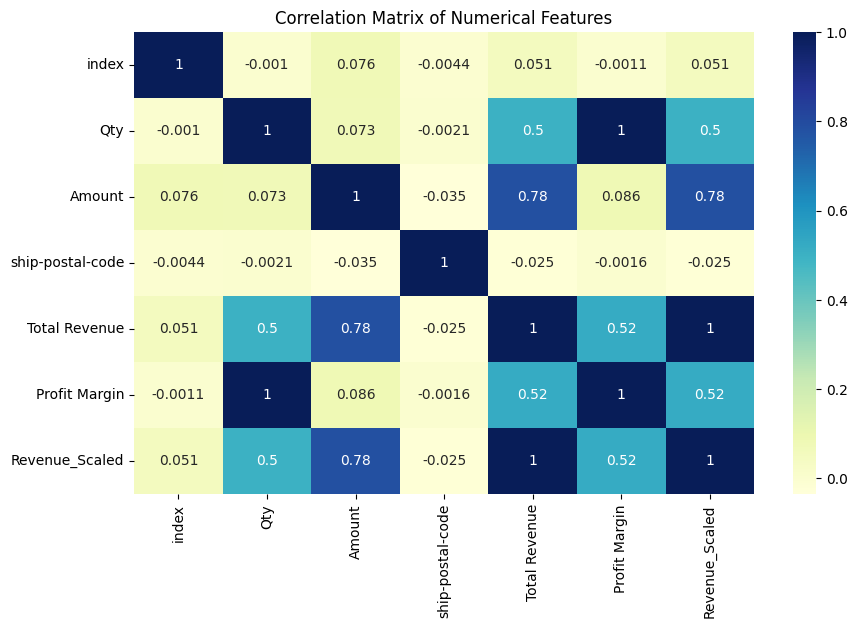

In [43]:
#heatmap - Correlation Across Features
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [44]:
# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Create an interactive heatmap using Plotly
fig = px.imshow(corr_matrix,
                text_auto=True,
                aspect="auto",
                title='Interactive Correlation Matrix of Numerical Features',
                color_continuous_scale='YlGnBu')

fig.show()

## 📌 Insights from Segment Analysis

- **B2C transactions** account for the majority of revenue, suggesting strong retail performance.
- Revenue is concentrated in a few key cities, indicating opportunities for regional growth.
- Strong correlation between Quantity and Revenue, confirming pricing model alignment.


# Dashboard Structure: E-commerce Sales Overview

# 🛍️ E-commerce Sales Dashboard
This dashboard highlights key metrics and insights from Amazon's sales data, including revenue trends, customer segments, and product performance.





In [46]:
total_revenue = df['Total Revenue'].sum()
total_orders = len(df)
avg_order_value = df['Total Revenue'].mean()

print(f"Total Revenue: ₹{total_revenue:,.2f}")
print(f"Total Orders: {total_orders}")
print(f"Average Order Value: ₹{avg_order_value:,.2f}")


Total Revenue: ₹43,791,173.00
Total Orders: 70633
Average Order Value: ₹619.98


In [48]:
# Revenue by Country – Choropleth (Interactive Map)
# Revenue by Category (Bar Chart)
# Revenue Over Time (Line Chart)
# B2B vs B2C (Pie Chart)
# Top 10 Cities (Bar Chart)
# Correlation Heatmap
# include all these in a single sheet, like a dashboard for interactive visualization
fig.show()

In [54]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create subplots
fig = make_subplots(rows=3, cols=2,
                    specs=[[{'type':'choropleth'}, {'type':'bar'}],
                           [{'type':'scatter'}, {'type':'pie'}],
                           [{'type':'bar'}, {'type':'heatmap'}]],
                    subplot_titles=('🌐 Revenue by Country', 'Order Volume by Category',
                                    'Revenue Over Time', 'Revenue Breakdown: B2B vs B2C',
                                    'Top 10 Cities by Revenue', 'Correlation Matrix of Numerical Features'))

# 1. Revenue by Country – Choropleth
country_rev = df.groupby('ship-country')['Total Revenue'].sum().reset_index()
fig.add_trace(go.Choropleth(
    locations=country_rev['ship-country'],
    z=country_rev['Total Revenue'],
    locationmode='country names',
    colorscale='Viridis',
    colorbar_title='Revenue (₹)',
    marker_line_color='darkgrey',
    marker_line_width=0.5,
    hovertemplate='<b>%{location}</b><br>Total Revenue: ₹%{z:,.2f}<extra></extra>'
), row=1, col=1)

# 2. Category-Wise Order Counts (using countplot data)
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']
fig.add_trace(go.Bar(
    x=category_counts['Category'],
    y=category_counts['Count'],
    marker=dict(color=category_counts['Count'], colorscale='Blues')
), row=1, col=2)

# 3. Revenue Over Time (Line Chart)
time_series = df.groupby('Date')['Total Revenue'].sum().reset_index()
fig.add_trace(go.Scatter(
    x=time_series['Date'],
    y=time_series['Total Revenue'],
    mode='lines',
    name='Revenue Over Time',
    line=dict(color='green')
), row=2, col=1)

# 4. B2B vs B2C (Pie Chart)
b2b_rev = df.groupby('B2B')['Total Revenue'].sum().reset_index()
fig.add_trace(go.Pie(
    labels=b2b_rev['B2B'],
    values=b2b_rev['Total Revenue'],
    hoverinfo='label+percent+value',
    textinfo='percent',
    domain=dict(x=[0, 1], y=[0, 1]) # Adjust domain if needed
), row=2, col=2)

# 5. Top 10 Cities by Sales (Bar Chart)
city_sales = df.groupby('ship-city')['Total Revenue'].sum().nlargest(10).reset_index()
fig.add_trace(go.Bar(
    x=city_sales['ship-city'],
    y=city_sales['Total Revenue'],
    marker=dict(color=city_sales['Total Revenue'], colorscale='Oranges')
), row=3, col=1)

# 6. Correlation Heatmap
corr_matrix = df.corr(numeric_only=True)
fig.add_trace(go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.index,
    colorscale='YlGnBu',
    text=corr_matrix.values.round(2),
    texttemplate="%{text}",
    hovertemplate="Correlation between %{y} and %{x}: %{z:.2f}<extra></extra>"
), row=3, col=2)


# Update layout
fig.update_layout(height=16ṅ00, width=1600, title_text="E-commerce Sales Dashboard Overview")

fig.show()

## 📌 Key Insights and Observations

Based on the analysis of the e-commerce sales data, here are some key insights:

- **Overall Revenue and Order Volume:** We have a clear overview of the total revenue and order volume, along with the average order value.
- **Category Performance:** The "Set" and "kurta" categories are the most popular based on order volume. Further analysis could explore revenue within these categories.
- **Time-based Trends:** The line chart shows the revenue trend over time, highlighting fluctuations and potential seasonality.
- **B2B vs. B2C:** The pie chart clearly demonstrates that B2C transactions contribute the vast majority of the total revenue.
- **Geographical Performance:** While the choropleth map indicates sales are primarily within India, the top 10 cities by revenue show specific urban areas with high sales activity. This suggests potential for targeted marketing or logistical optimization in these areas.
- **Correlation Analysis:** The correlation heatmap reveals relationships between numerical features. The strong positive correlation between 'Qty' and 'Total Revenue' is expected and validates the pricing structure. The relatively low correlation between 'Amount' and 'Total Revenue' (compared to 'Qty' and 'Total Revenue') might warrant further investigation into pricing strategies or product mix.
- **Impact of Courier Status:** The boxplot of Amount by Courier Status can reveal if there are significant differences in the value of orders based on their courier status.

These insights provide a foundation for making data-driven decisions to optimize sales strategies, improve customer targeting, and manage inventory effectively.